# 商超数据分析报告 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [14]:
df = pd.read_excel('market.xlsx')
df.head()

,发货前天数（实际）,发货前天数（计划）,每笔订单利润,销售额预测,每名客户销售额,装运状态,记录数,利润率,产品名称,利润,...,客户名称,折扣,数量,省/自治区,类别,细分,订单 ID,订单日期,邮寄方式,销售额
0,2,3,-61,170,130,提前装运,1,-0.47,"Fiskars 剪刀, 蓝色",-61,...,曾惠,0.4,2,浙江,办公用品,公司,US-2018-1357144,2018-04-27,二级,130
1,4,6,43,164,125,提前装运,1,0.34,"GlobeWeis 搭扣信封, 红色",43,...,许安,0.0,2,四川,办公用品,消费者,CN-2018-1973789,2018-06-15,标准级,125
2,4,6,4,42,32,提前装运,1,0.13,"Cardinal 孔加固材料, 回收",4,...,许安,0.4,2,四川,办公用品,消费者,CN-2018-1973789,2018-06-15,标准级,32
3,4,6,-27,421,321,提前装运,1,-0.08,"Kleencut 开信刀, 工业",-27,...,宋良,0.4,4,江苏,办公用品,公司,US-2018-3017568,2018-12-09,标准级,321
4,2,3,550,1803,1376,提前装运,1,0.40,"KitchenAid 搅拌机, 黑色",550,...,万兰,0.0,3,广东,办公用品,消费者,CN-2017-2975416,2017-05-31,二级,1376


In [15]:
df=df.drop(['订单 ID','发货日期','国家'],axis=1)

## (一) 销售额按照地区与细分消费划分

In [40]:
result1= df.groupby(['类别','地区'])['销售额'].sum().reset_index(name="销售额总和") 

In [ ]:
result1

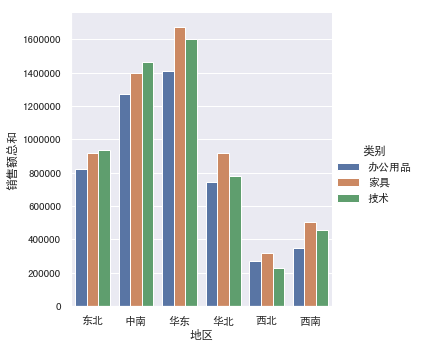

In [20]:
sns.catplot(x="地区", y="销售额总和", hue="类别", kind='bar', data=result1)

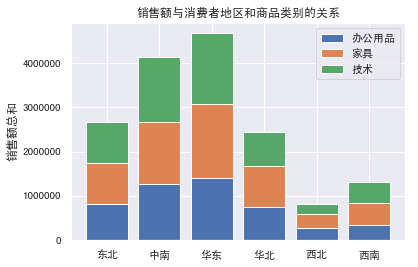

In [55]:
labels = ['东北', '中南', '华东', '华北', '西北','西南']
work_item= result1[0:6]['销售额总和']
fur_item = result1[6:12]['销售额总和']
logical_item = result1[12:]['销售额总和']
#width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, work_item,  label='办公用品')
ax.bar(labels, fur_item,bottom=work_item, label='家具')
ax.bar(labels, logical_item, bottom=work_item.values+fur_item.values, label='技术')

ax.set_ylabel('销售额总和')
ax.set_title('销售额与消费者地区和商品类别的关系')
ax.legend()

plt.show()

In [32]:
del result1

* **分析**：该超市的消费区域来看，华东地区的销售额最多，在各个地区中，家具占比最大

In [6]:
result10 = df.groupby(['地区'])['销售额'].sum().reset_index(name="销售额总和")

In [ ]:
result10

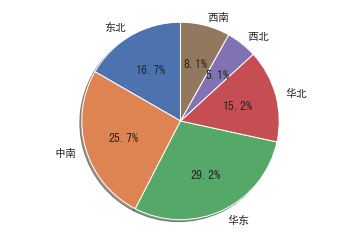

In [9]:
labels = ['东北', '中南', '华东', '华北','西北','西南']
sizes = result10['销售额总和'].values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
del result10

* **分析**：该超市的6个消费区域来看，华东和中南占比最大，两个区域占总销售额的54.9%；东北和华北销售额差不多，分别居于第三第四；西南和西北销售额最少。前四项的销售额占比86.8%。

## (二) 销售额按照城市与消费者类型划分

In [83]:
result2_1 = df.groupby(['城市','地区'])['销售额'].sum().reset_index(name="销售额总和") 

In [ ]:
result2_1.sort_values(by='销售额总和',ascending=False)

In [81]:
del result2_1

In [ ]:
city=['上海','天津','北京','深圳','重庆','广州','沈阳','武汉','西安','青岛']

In [61]:
result2= df.groupby(['城市','地区','细分'])['销售额'].sum().reset_index(name="销售额总和") 

In [66]:
a=result2[result2['城市'].isin(city)]

In [ ]:
a

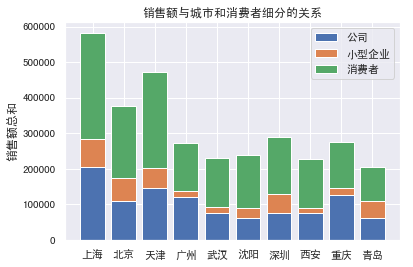

In [74]:
labels=['上海','北京','天津','广州','武汉','沈阳','深圳','西安','重庆','青岛']

tags=['公司','小型企业','消费者']
fig, ax = plt.subplots()
temp=[0,0,0,0,0, 0,0,0,0,0]

for i in tags:
    t = t = a[a['细分']==i]['销售额总和'].values
    ax.bar(labels, t, bottom=temp, label=i)
    temp += t

ax.set_ylabel('销售额总和')
ax.set_title('销售额与城市和消费者细分的关系')
ax.legend()

plt.show()

* **分析**：首先我们对全部城市进行销售额统计。该超市的消费城市来看，上海、北京、天津、广州、武汉、沈阳、深圳、西安、重庆、青岛为销售额前10的城市（分布于华东、华北、中南等地区）；从消费者类别来看，公司和消费者贡献了绝大多数的销售额。

In [ ]:
result3 = result2_1[result2_1['地区']=='华东']
result3.sort_values(by='销售额总和',ascending=False)

In [87]:
city=['上海','青岛','厦门','宿州','济南']

In [ ]:
b=result2[result2['城市'].isin(city)]
b

In [92]:
def insert(df, i, df_add):
    # 指定第i行插入一行数据
    df1 = df.iloc[:i, :]
    df2 = df.iloc[i:, :]
    df_new = pd.concat([df1, df_add, df2], ignore_index=True)
    return df_new

In [96]:
df_add = pd.DataFrame({'城市':['厦门'], '地区':['华东'], '细分':['小型企业'], '销售额总和':[0]})
# 在第2行插入一条新的数据
df_new = insert(b, 4, df_add)

In [99]:
b = df_new

In [ ]:
b

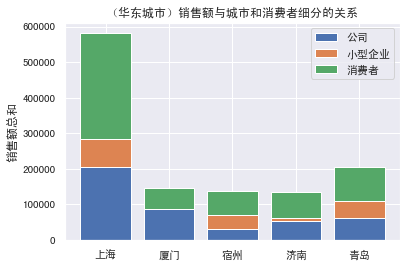

In [101]:
labels=['上海','厦门','宿州','济南','青岛']

tags=['公司','小型企业','消费者']
fig, ax = plt.subplots()
temp=[0,0,0,0,0]

for i in tags:
    t = b[b['细分']==i]['销售额总和'].values
    ax.bar(labels, t, bottom=temp, label=i)
    temp += t

ax.set_ylabel('销售额总和')
ax.set_title('（华东城市）销售额与城市和消费者细分的关系')
ax.legend()

plt.show()

* **分析**：我们再对销售额占比最大的地区（华东）的城市进行观察。在华东地区，上海、青岛、厦门、宿州、济南为销售额前5的城市；从消费者类别来看，公司和消费者贡献了绝大多数的销售额。

* **（一、二）分析**：从销售额角度看：地区方面，我们可以把营销精力更多的放在华东和中南地区（东北和华北次之），因为这些区域的销售额占比最大；在城市方面，一线城市的销售额占比大，建议投入更多的营销精力；在消费者分类方面，公司和消费者个人的销售额占比大，可以投入更多营销精力。

## （三） 销售额与利润的关系

In [16]:
result11=df.groupby(['产品名称'])['利润'].sum().reset_index(name="利润和")
result12=df.groupby(['产品名称'])['销售额'].sum().reset_index(name="销售额和")

In [17]:
data_plot = pd.DataFrame({"利润和":result11["利润和"].values, "销售额和":result12["销售额和"].values})

In [ ]:
data_plot

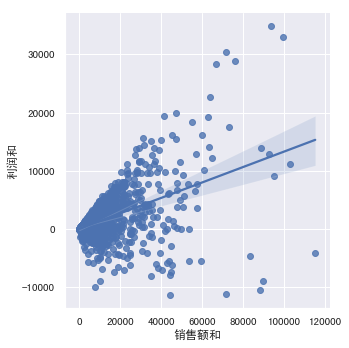

In [23]:
sns.lmplot(y="利润和", x="销售额和", data=data_plot)

* **分析**：利润与销售额总体呈现线性关系（正相关）。

## （四） 利润按照地区和商品类别划分

In [ ]:
result5 = df.groupby(['地区'])['利润'].sum().reset_index(name="利润总和")
result5

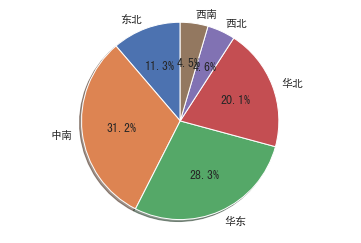

In [13]:
labels = ['东北', '中南', '华东', '华北','西北','西南']
sizes = result5['利润总和'].values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
del result5

* **分析**：利润按照地区划分和销售额按照地区划分分布差不多。中南和华东占比最大（中南地区利润额最大），两个区域占总利润总和的59.5%；华北和东北利润额差不多，分别居于第三第四；西南和西北销售额最少。前四项的销售额占比91.9%。

In [ ]:
result6 = df.groupby(['类别','子类别'])['利润'].sum().reset_index(name="利润总和") 
result6

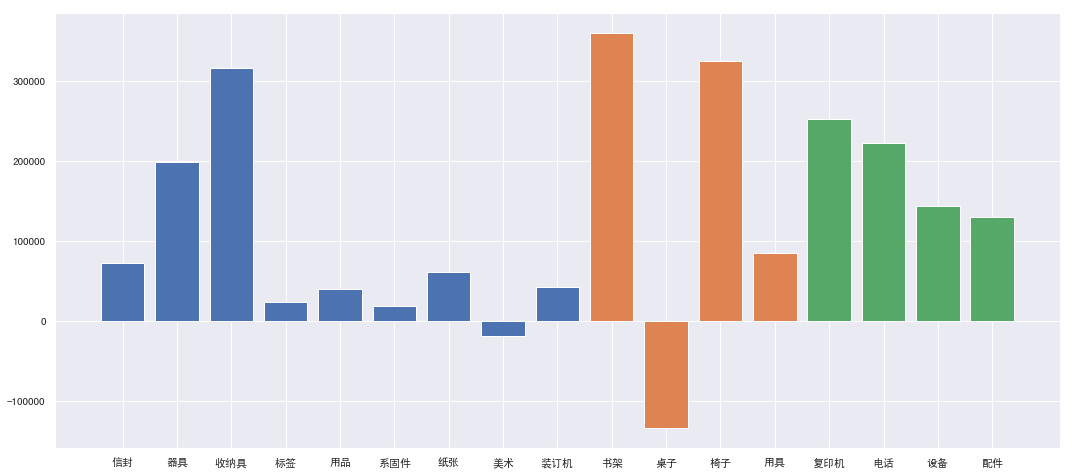

In [20]:
data = result6['利润总和'].values
labels = result6['子类别'].values

fig, ax = plt.subplots(figsize=(18,8))

ax.bar(labels[:9], data[:9])
ax.bar(labels[9:13], data[9:13])
ax.bar(labels[13:], data[13:])

plt.show()

* **分析**：由图可见，在各类商品中，书架的利润最高，其次是椅子、收纳具、复印机等。美术和桌子的利润为负。

* 为了提高利润，我们要寻找美术和桌子利润为负的原因（折扣不当、原料、生产加工工艺等），使其为正。营销方面，我们可以加大对椅子、收纳具、复印机等商品的营销。

## （五） 装运状态及地区

In [ ]:
result7 = df.groupby(['地区','装运状态'])['记录数'].sum().reset_index(name="记录和") 
result7

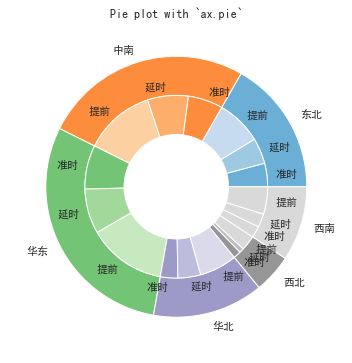

In [62]:
import numpy as np

vals = np.zeros((6,3))
count=0
for i in range(0,17,3):
    vals[count] = result7[i:i+3]['记录和'].values
    count+=1
    
fig, ax = plt.subplots(figsize=(6,6))

size = 0.3

labels = ['东北', '中南', '华东', '华北','西北','西南']
labels2=['准时','延时','提前']*6
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([1, 5, 9, 13, 17,  20])
inner_colors = cmap([1,2,3,  5,6,7,  9,10,11,  13,14,15,  17,18,19,  20,21,22 ])

ax.pie(vals.sum(axis=1), labels=labels,radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), labels=labels2,radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [63]:
del result7

* **分析**：大部分商品装运都能准时或提前，但是仍有约1/4概率延迟，地区差异并不明显，需要从装运过程寻找原因提高装运速度。

## （六） 订单日期及销售额

In [ ]:
result8 = df.groupby(['订单日期'])['销售额'].sum().reset_index(name="销售额总和") 
result8

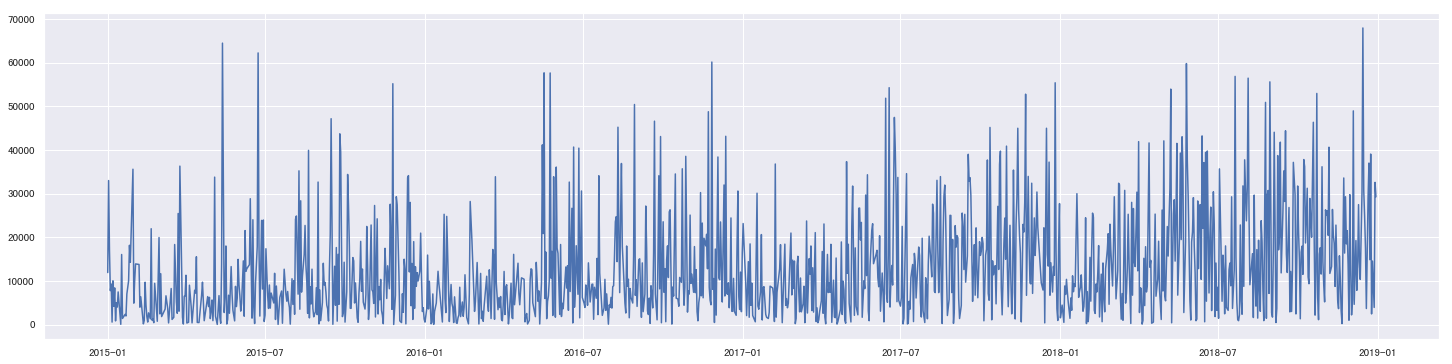

In [75]:
fig, ax = plt.subplots(figsize=(25,6))

ax.plot(result8['订单日期'].values, result8['销售额总和'].values)

* **分析**：由订单分布图可见，自 2015 年至 2018 年，每年 6 月与 11 月销售额将处于一个次波峰与波峰，其他时间，动态波动.